## Information gain - mutual information

Mutual information measures how much information the presence/absence of a feature contributes to making the correct prediction on Y.

As extracted from [wikipedia](https://en.wikipedia.org/wiki/Mutual_information):

Mutual information measures the information that X and Y share: It measures how much knowing one of these variables reduces uncertainty about the other. For example, if X and Y are independent, then knowing X does not give any information about Y and vice versa, so their mutual information is zero. At the other extreme, if X is a deterministic function of Y and Y is a deterministic function of X then all information conveyed by X is shared with Y: knowing X determines the value of Y and vice versa. As a result, in this case the mutual information is the same as the uncertainty contained in Y (or X) alone, namely the entropy of Y (or X). Moreover, this mutual information is the same as the entropy of X and as the entropy of Y. (A very special case of this is when X and Y are the same random variable.)

I will demonstrate how to select features based on mutual information using sklearn on a regression and classification problem. For classification I will use the Paribas claims dataset from Kaggle. For regression, the House Price dataset from Kaggle.

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [2]:
path = os.path.abspath("Data/paribas.csv")
path

'C:\\Users\\bberry\\Documents\\github\\2020MLTraining\\Feature Selections\\Data\\paribas.csv'

In [3]:
# load dataset
data = pd.read_csv(path, nrows=50000)
data.shape

(50000, 133)

In [4]:
data.head()

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,...,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,...,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,...,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,...,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN


In [5]:
# In practice, feature selection should be done after data pre-processing,
# so ideally, all the categorical variables are encoded into numbers,
# and then you can assess how deterministic they are of the target

# here for simplicity I will use only numerical variables
# select numerical columns:

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape

(50000, 114)

### Important

In all feature selection procedures, it is good practice to select the features by examining only the training set. And this is to avoid overfit.

In [6]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target', 'ID'], axis=1),
    data['target'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((35000, 112), (15000, 112))

In [7]:
# calculate the mutual information between the variables and the target
# this returns the mutual information value of each feature
# the smaller the value the less information the feature has about the
# target
mi = mutual_info_classif(X_train.fillna(0), y_train)
mi

array([4.08052519e-03, 4.92424832e-03, 3.64783387e-03, 2.05798643e-03,
       5.02402142e-03, 2.18553801e-03, 5.84620512e-03, 1.75739172e-03,
       2.68462884e-02, 4.29136143e-03, 1.73083446e-02, 5.47924992e-03,
       2.36785089e-02, 5.41430870e-03, 5.17274305e-03, 3.26540019e-03,
       2.09377554e-03, 4.53460768e-03, 0.00000000e+00, 1.17400600e-02,
       0.00000000e+00, 5.19076061e-03, 4.34427693e-03, 3.21947413e-03,
       4.87716405e-03, 3.10942469e-03, 1.26564592e-03, 7.66568118e-03,
       8.48497855e-03, 5.33117458e-03, 1.54660605e-03, 4.53288059e-03,
       2.70014457e-03, 4.99861391e-03, 7.18002781e-03, 6.45268523e-03,
       6.55886135e-03, 2.25611893e-03, 2.82143255e-03, 6.18205085e-03,
       7.58654847e-03, 4.60965748e-03, 2.96146846e-03, 3.90437386e-02,
       7.97228277e-03, 1.98803945e-04, 7.88816956e-03, 3.95314118e-03,
       5.06627122e-03, 4.86218160e-03, 6.39827653e-03, 3.31343071e-03,
       4.15659949e-03, 1.74553038e-02, 5.28213126e-03, 5.74179842e-03,
      

In [9]:
type(mi)
X_train.columns

Index(['v1', 'v2', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11',
       ...
       'v121', 'v122', 'v123', 'v124', 'v126', 'v127', 'v128', 'v129', 'v130',
       'v131'],
      dtype='object', length=112)

In [10]:
# let's add the variable names and order the features
# according to the MI for clearer visualisation
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False)

v50     0.039044
v10     0.026846
v14     0.023679
v62     0.017455
v12     0.017308
          ...   
v102    0.000075
v68     0.000000
v97     0.000000
v20     0.000000
v23     0.000000
Length: 112, dtype: float64

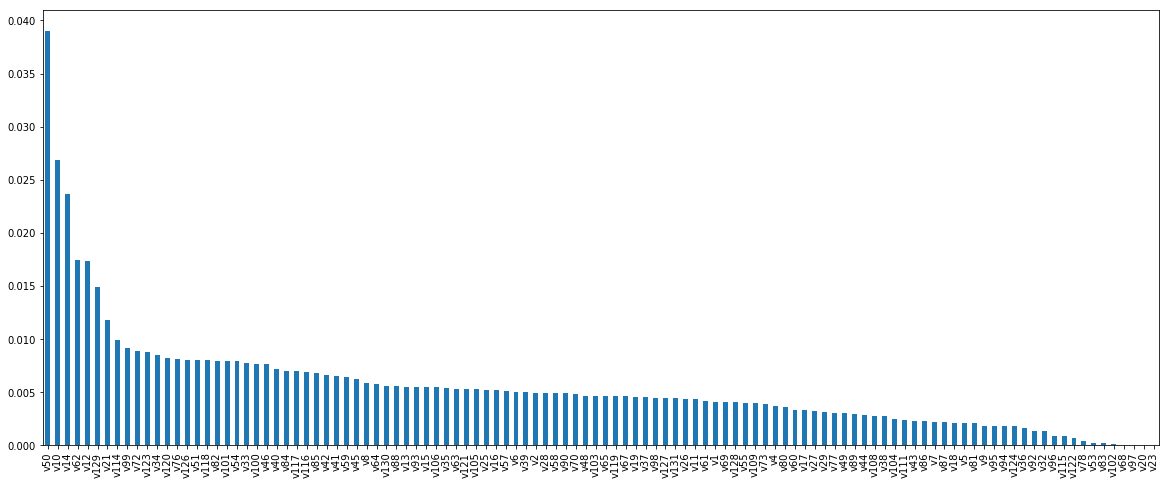

In [11]:
# and now let's plot the ordered MI values per feature
mi.sort_values(ascending=False).plot.bar(figsize=(20, 8))

Comparatively, we can see that there are a few features (left of the plot) that seem to contribute the most to predicting the target.There are also a few features with almost zero MI values on the right of the plot.

As I explained in the previous lecture, where to put the cut-off to select features is arbitrary. One could choose a certain value of MI after studying the plot above. An alternative and most frequent way of selecting features is to select the top 10, or top 20 features, or the features in the the top 10th percentile of the MI value distribution.

To do this, you can use mutual info in combination with SelectKBest or SelectPercentile from sklearn. SelectKBest allows you to determine how many features, and SelectPercentile the features within a certain percentile. See below.

In [12]:
# here I will select the top 10 features
# which are shown below
sel_ = SelectKBest(mutual_info_classif, k=10).fit(X_train.fillna(0), y_train)
X_train.columns[sel_.get_support()]

Index(['v10', 'v12', 'v14', 'v21', 'v50', 'v62', 'v72', 'v101', 'v114',
       'v129'],
      dtype='object')

### Regression

In [14]:
# load dataset
housepath = os.path.abspath("Data/houseprice.csv")
data = pd.read_csv(housepath)
data.shape

(1460, 81)

In [15]:
# In practice, feature selection should be done after data pre-processing,
# so ideally, all the categorical variables are encoded into numbers,
# and then you can assess how deterministic they are of the target

# here for simplicity I will use only numerical variables
# select numerical columns:

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape

(1460, 38)

In [16]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['SalePrice'], axis=1),
    data['SalePrice'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((1022, 37), (438, 37))

In [17]:
# determine the mutual information
mi = mutual_info_regression(X_train.fillna(0), y_train)
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False)

OverallQual      0.538496
GrLivArea        0.481314
TotalBsmtSF      0.382196
GarageCars       0.378005
GarageArea       0.369823
YearBuilt        0.347198
1stFlrSF         0.313219
GarageYrBlt      0.274182
FullBath         0.262696
MSSubClass       0.256390
YearRemodAdd     0.245564
2ndFlrSF         0.215795
LotFrontage      0.204897
Fireplaces       0.192427
TotRmsAbvGrd     0.183684
OpenPorchSF      0.171885
LotArea          0.166647
BsmtFinSF1       0.160979
BsmtUnfSF        0.111428
MasVnrArea       0.103058
OverallCond      0.101720
HalfBath         0.077617
WoodDeckSF       0.064073
BedroomAbvGr     0.027155
KitchenAbvGr     0.022733
BsmtFullBath     0.021237
EnclosedPorch    0.016814
ScreenPorch      0.016447
BsmtHalfBath     0.013470
3SsnPorch        0.004626
YrSold           0.002376
MiscVal          0.000976
BsmtFinSF2       0.000071
LowQualFinSF     0.000000
MoSold           0.000000
PoolArea         0.000000
Id               0.000000
dtype: float64

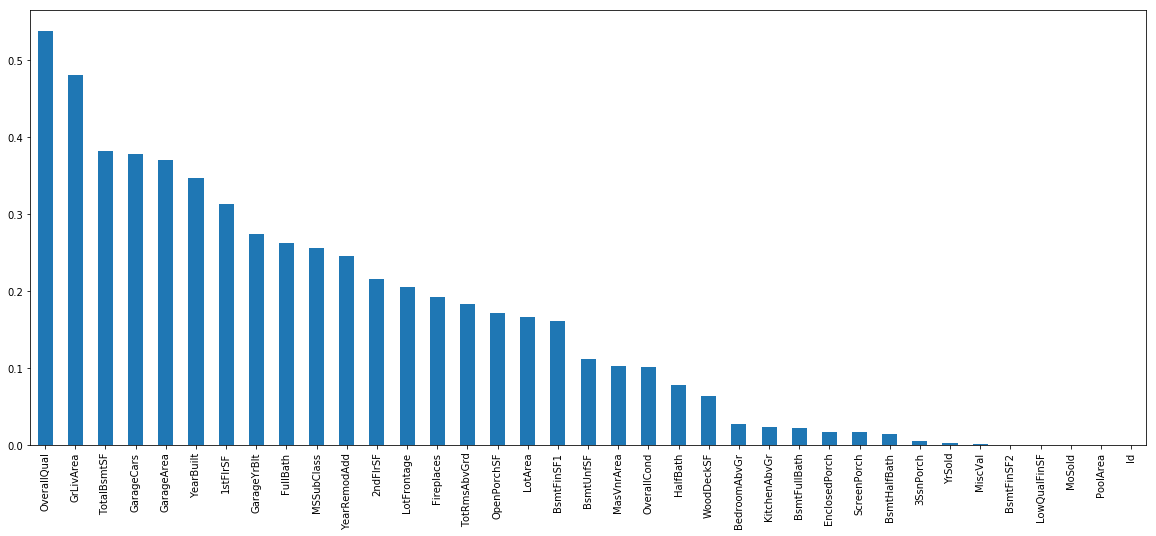

In [18]:
mi.sort_values(ascending=False).plot.bar(figsize=(20,8))

In [19]:
# here I will select the top 10 percentile
sel_ = SelectPercentile(mutual_info_regression, percentile=10).fit(X_train.fillna(0), y_train)
X_train.columns[sel_.get_support()]

Index(['OverallQual', 'TotalBsmtSF', 'GrLivArea', 'GarageCars'], dtype='object')

I have not personally used mutual information in any of my projects. However, there is some value in the method. See for example:

Comparison between univariate and mutual information selection in [sklean website](http://scikit-learn.org/stable/auto_examples/feature_selection/plot_f_test_vs_mi.html#sphx-glr-auto-examples-feature-selection-plot-f-test-vs-mi-py)

In addition, mutual information has been widely covered, if anything else from a theoretical perspective, in several articles that I share in the additional reading resources section. Therefore I wanted to have it covered in the course, and I leave it up to you to explore it and see if you find any use in it.

That is all for this lecture, I hope you enjoyed it and see you in the next one!